In [32]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_1d_slice

In [33]:
gamma = 1.4
rho0 = 1
cs0 = 1
P0 = 1 / gamma
A = 1e-5


def nonlinear_sound_wave(array_slicer, x, y, z, t, *, xp):
    _slc = array_slicer

    def vp(x, t):
        return A * np.sin(2 * np.pi * (x - t)) - A**2 * (
            gamma + 1
        ) / 4 * 2 * np.pi * t * np.sin(4 * np.pi * (x - t))

    out = np.zeros((5, *x.shape))
    out[_slc("rho")] = rho0 + rho0 * vp(x, 0)  # only valid for t=0
    out[_slc("vx")] = vp(x, t)
    out[_slc("P")] = P0 + gamma * P0 * vp(x, 0)  # only valid for t=0
    return out


N = 1024
p = 3

sim = EulerSolver(
    ic=nonlinear_sound_wave,
    gamma=gamma,
    nx=N,
    p=p,
    CFL=0.8,
    riemann_solver="hllc",
    flux_recipe=3,
)
sim.run(n=10)

Step #10 @ t=7.81e-03 | dt=7.81e-04 | min(rho)=1.00e+00, min(P)=7.14e-01 | (done)                   


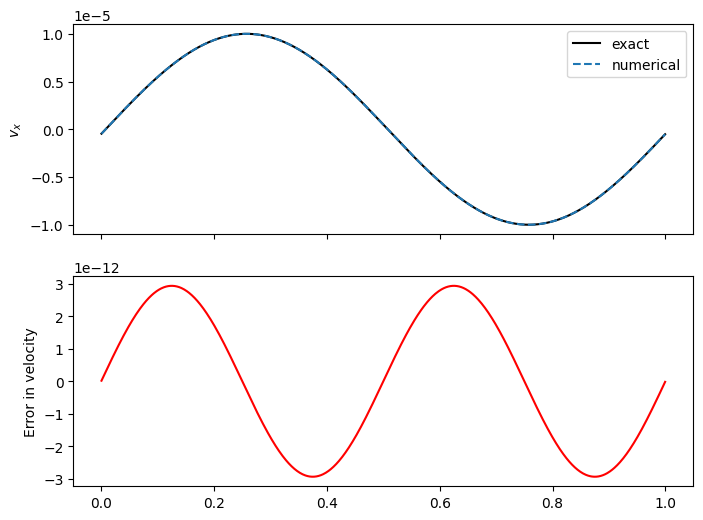

In [34]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
axs[0].set_ylabel(r"$v_x$")
axs[1].set_ylabel("Error in velocity")

idx = sim.variable_index_map
mesh = sim.mesh

vx_numerical = sim.snapshots[-1]["wcc"][idx("vx")].flatten()
vx_exact = nonlinear_sound_wave(idx, mesh.X, mesh.Y, mesh.Z, sim.t, xp=np)[
    idx("vx")
].flatten()

axs[0].plot(mesh.x_centers, vx_exact, color="k", label="exact")
plot_1d_slice(sim, axs[0], "vx", x=None, linestyle="--", label="numerical")

axs[1].plot(mesh.x_centers, vx_numerical - vx_exact, color="red")

axs[0].legend()